## Attrition Model with Logistic Regression

<img style="float: left;" src="https://memegenerator.net/img/instances/50045603/guess-who-just-quit-their-job.jpg" width="250"/>



### About the dataset

I will use a dataset of fictitious employeses to **predict employ churn with logistic regression**. This dataset includes employees' general information (age, gender, department, year at company, performace rating, etc) and employee survey result.


Data Source: HR Analytics Case Study (https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study)

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [143]:
# Combine the dataset
data1 = pd.read_csv("general_data.csv")
data2 = pd.read_csv("employee_survey_data.csv")
data3 = pd.read_csv("manager_survey_data.csv")
data = pd.concat([data1, data2, data3], axis=1)
df = data.copy()

print("Number of employee:", len(df))

Number of employee: 4410


In [144]:
pd.options.display.max_columns = None
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3.0,4.0,2.0,1,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,3.0,2.0,4.0,2,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2.0,2.0,1.0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4,4.0,4.0,3.0,4,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,5,4.0,1.0,3.0,5,3,3


### Data pre-processing and selection

In [145]:
# Change target data type to integer 1 and 0
df = df.replace(to_replace="Yes", value=1)
df = df.replace(to_replace="No", value=0)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3.0,4.0,2.0,1,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,3.0,2.0,4.0,2,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2.0,2.0,1.0,3,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4,4.0,4.0,3.0,4,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,5,4.0,1.0,3.0,5,3,3


In [146]:
# Convert categorical data "BusinessTravel" into dummy set
Travel = pd.get_dummies(df["BusinessTravel"])
Travel = Travel.drop("Travel_Rarely", axis=1)
df = df.drop("BusinessTravel", axis=1)
df = pd.concat([df, Travel], axis=1)

In [147]:
# Check missing value
data.isnull().sum(axis = 0)

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
dtype: int64

The percentage is quite low (out of total 4410 employees), thus I will remove them from dataset. 

In [148]:
# Remove missing data
df.dropna(subset=["TotalWorkingYears", "NumCompaniesWorked", "EnvironmentSatisfaction","JobSatisfaction", "WorkLifeBalance"], inplace= True) 
print("Number of employee (clean dataset):", len(df))

Number of employee (clean dataset): 4300


In [149]:
# Remove column with only one distinct value
df.drop("EmployeeID", inplace=True, axis=1)
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col, inplace=True, axis=1)

print("Original dataset:", data.shape)
print("Clean dataset:", df.shape)

Original dataset: (4410, 31)
Clean dataset: (4300, 26)


## Exploratory Data Analysis
First, I will look at **if any department has significantly higher attrition rate**.

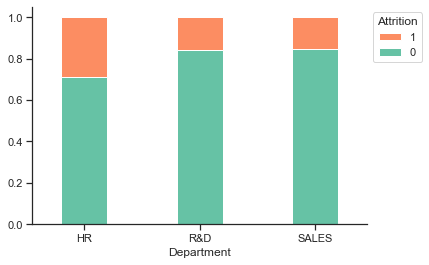

In [150]:
# Extract dataset by department
df_dept = df.groupby(["Department", "Attrition"]).size().reset_index().pivot(columns='Attrition', index='Department', values=0).T

# Calculate percentage
df_dept['HR'] = df_dept['Human Resources']/df_dept['Human Resources'].sum()
df_dept['R&D'] = df_dept['Research & Development']/df_dept['Research & Development'].sum()
df_dept['SALES'] = df_dept['Sales']/df_dept['Sales'].sum()

df_dept_plot = df_dept[["HR", "R&D", "SALES"]].T

# Set up the figure
sns.set(style="ticks", palette="Set2")
mpl.rcParams['axes.spines.right'] = False 
mpl.rcParams['axes.spines.top'] = False

# Plot the stacked bar chart
barwidth = 0.4
ax = df_dept_plot.plot(kind='bar', width=barwidth, stacked=True)

# Finalize the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Attrition", bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

Among three departments, **HR has higher attrition rate**. We can compare if employee survey shows negative result in HR department. Or, if performance is generally lower in HR and many left for performance issue.

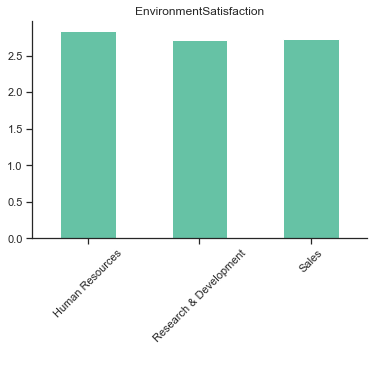

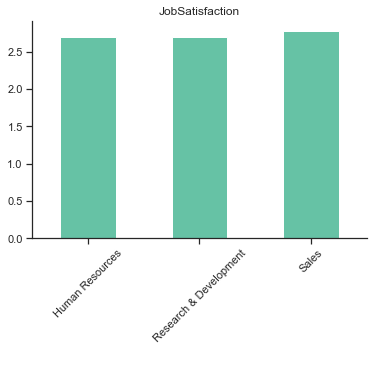

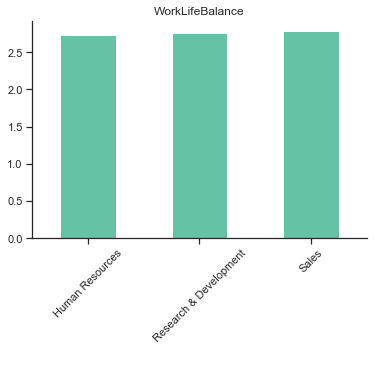

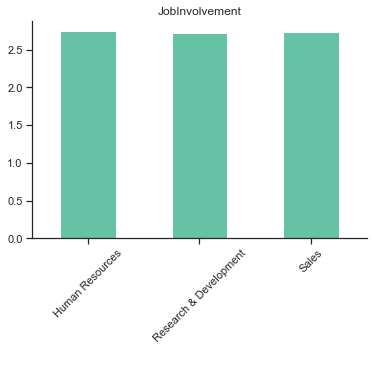

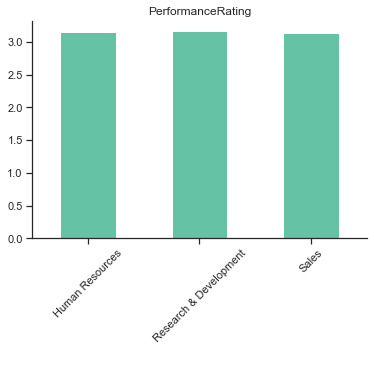

In [151]:
survey = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating"]
for i in survey:
    df.groupby("Department")[i].mean().plot(kind="bar")
    plt.xticks(rotation=45)
    plt.title(i)
    plt.xlabel(" ")
    plt.show()

As there's no significant differences from survey results and preformance rating, one alternatvie approach may be analyzing exit interview to deep dive into why HR Deparment has higher attrition. However it's out of the scope of this analysis.

Next, we look at **age distribution** of those left the company.

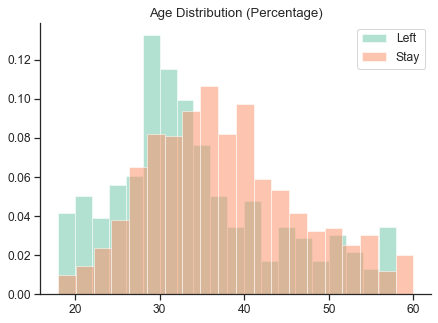

In [152]:
# Extract dataset
Y = df[df["Attrition"]==1]["Age"]
N = df[df["Attrition"]==0]["Age"]

# Initialize the figure
sns.set(style="ticks", palette="Set2", font_scale=1.1)
f, ax = plt.subplots(figsize=(7, 5))

# Compare 2 histograms with y-axis as percentage
plt.hist(Y, bins=20, weights=np.ones(len(Y)) / len(Y), alpha=0.5, label='Left')
plt.hist(N, bins=20, weights=np.ones(len(N)) / len(N), alpha=0.5, label='Stay')
plt.legend(loc='upper right')

# Finalize the plot
sns.despine(bottom=False)
plt.title("Age Distribution (Percentage)")
plt.show()

For employees who quit, the distribution is relatively **left skewed**. It may reflect the issue of why millennials quit, which many companies and business leaders are paying attention to.

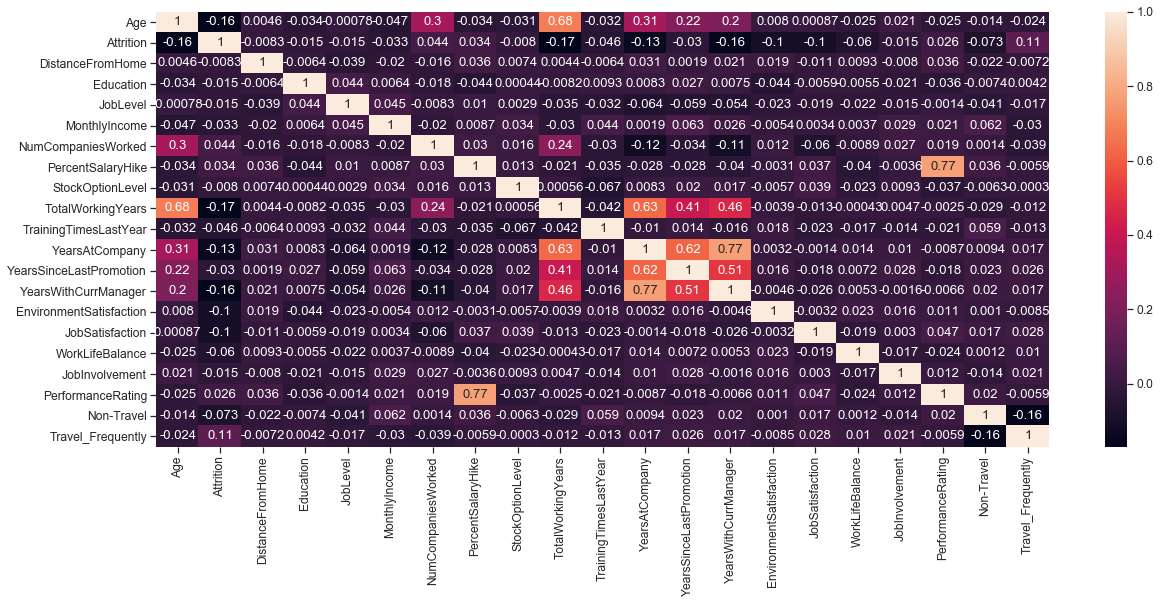

In [153]:
# Visualize the correlation matrix with heatmap
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot = True)
plt.show()

## Logistic Regression Modeling

Lastly, I will implement a predictive model with ScikitLearn package.

In [154]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Non-Travel',
       'Travel_Frequently'],
      dtype='object')

In [155]:
# Define x and y
x = np.asarray(df[['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                   'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
                   'PerformanceRating', 'Non-Travel', 'Travel_Frequently']])
y = np.asarray(df["Attrition"])

In [110]:
# Normalize the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3010, 19) (3010,)
Test set: (1290, 19) (1290,)


In [112]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
# Predict using test set
y_predict = logmodel.predict(x_test)
y_predict_prob = logmodel.predict_proba(x_test)

### Evaluation

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss

#### Accuracy Score

In [114]:
accuracy_score(y_test, y_predict)

0.8418604651162791

#### Classification Report

In [115]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1077
           1       0.64      0.10      0.17       213

    accuracy                           0.84      1290
   macro avg       0.74      0.54      0.54      1290
weighted avg       0.81      0.84      0.79      1290



#### Confusion Matrix

In [116]:
confusion_matrix(y_test, y_predict)

array([[1065,   12],
       [ 192,   21]], dtype=int64)

#### Log Loss

In [117]:
log_loss(y_test, y_predict_prob)

0.39926499509701685

### Thank You!

In [122]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmployeeID', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'EmployeeID', 'JobInvolvement',
       'PerformanceRating', 'Non-Travel', 'Travel_Frequently'],
      dtype='object')

In [137]:
df.drop("EmployeeID", inplace=True, axis=1)

In [138]:
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col, inplace=True, axis=1)